
Enter the patient's details:
Age: 20
Sex (Male/Female): Male
Cholesterol: 230
Blood Pressure (e.g., 120/80): 140/90
Heart Rate: 79
Diabetes (0 = No, 1 = Yes): 1
Family History of Heart Disease (0 = No, 1 = Yes): 1
Smoking (0 = No, 1 = Yes): 0
Obesity (0 = No, 1 = Yes): 0
Alcohol Consumption (0 = No, 1 = Yes): 0
Exercise Hours Per Week: 5
Diet (Healthy/Average/Unhealthy): Healthy
Previous Heart Problems (0 = No, 1 = Yes): 0
Medication Use (0 = No, 1 = Yes): 1
Stress Level (0 = Low, 1 = High): 1
Sedentary Hours Per Day: 5
BMI: 23
Triglycerides: 200
Physical Activity Days Per Week: 6
Sleep Hours Per Day: 7

Prediction:  Low Risk of Heart Attack


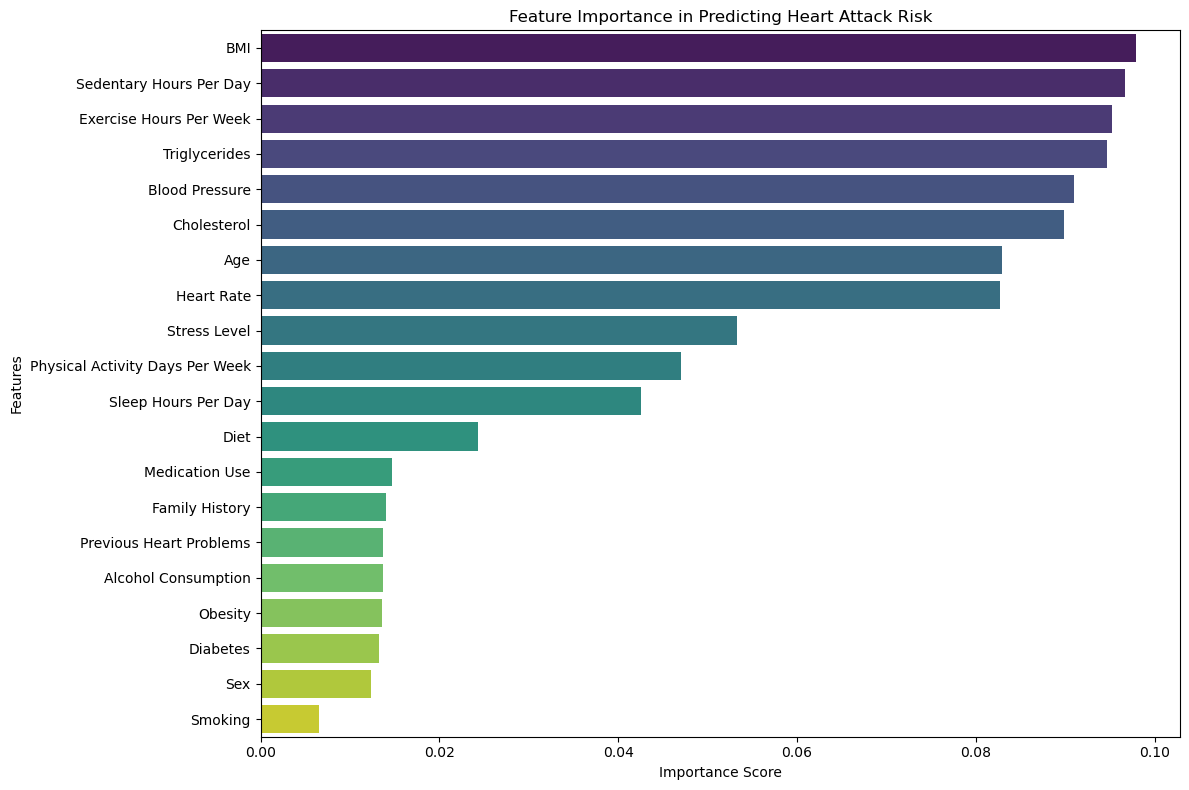

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = r'C:\Users\ansar\Downloads\archive (5)\heart_attack_prediction_dataset.csv'
data = pd.read_csv(dataset_path)

# Drop unnecessary columns
data.drop(['Patient ID', 'Country', 'Continent', 'Hemisphere', 'Income'], axis=1, inplace=True)

# Encode non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns

for column in non_numeric_columns:
    if column == 'Blood Pressure':  # Handle separately if needed
        # Convert "120/80" to average BP (120 + 80) / 2
        data['Blood Pressure'] = data['Blood Pressure'].apply(
            lambda x: (int(x.split('/')[0]) + int(x.split('/')[1])) / 2
            if '/' in str(x) else None
        )
    else:
        # Encode other non-numeric columns
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))

# Drop rows with missing or invalid data
data.dropna(inplace=True)

# Separate features and target variable
X = data.drop('Heart Attack Risk', axis=1)
y = data['Heart Attack Risk']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Function to predict heart attack risk based on user input
def predict_heart_attack():
    print("\nEnter the patient's details:")
    age = int(input("Age: "))
    sex = input("Sex (Male/Female): ")
    cholesterol = int(input("Cholesterol: "))
    blood_pressure = input("Blood Pressure (e.g., 120/80): ")
    heart_rate = int(input("Heart Rate: "))
    diabetes = int(input("Diabetes (0 = No, 1 = Yes): "))
    family_history = int(input("Family History of Heart Disease (0 = No, 1 = Yes): "))
    smoking = int(input("Smoking (0 = No, 1 = Yes): "))
    obesity = int(input("Obesity (0 = No, 1 = Yes): "))
    alcohol_consumption = int(input("Alcohol Consumption (0 = No, 1 = Yes): "))
    exercise_hours = float(input("Exercise Hours Per Week: "))
    diet = input("Diet (Healthy/Average/Unhealthy): ")
    previous_heart_problems = int(input("Previous Heart Problems (0 = No, 1 = Yes): "))
    medication_use = int(input("Medication Use (0 = No, 1 = Yes): "))
    stress_level = int(input("Stress Level (0 = Low, 1 = High): "))
    sedentary_hours = float(input("Sedentary Hours Per Day: "))
    bmi = float(input("BMI: "))
    triglycerides = int(input("Triglycerides: "))
    physical_activity_days = int(input("Physical Activity Days Per Week: "))
    sleep_hours = int(input("Sleep Hours Per Day: "))

    # Preprocess the input
    blood_pressure_avg = (int(blood_pressure.split('/')[0]) + int(blood_pressure.split('/')[1])) / 2
    diet_encoded = {'Healthy': 0, 'Average': 1, 'Unhealthy': 2}.get(diet, 1)  # Default to 'Average'

    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'Age': [age],
        'Sex': [1 if sex.lower() == 'male' else 0],
        'Cholesterol': [cholesterol],
        'Blood Pressure': [blood_pressure_avg],
        'Heart Rate': [heart_rate],
        'Diabetes': [diabetes],
        'Family History': [family_history],
        'Smoking': [smoking],
        'Obesity': [obesity],
        'Alcohol Consumption': [alcohol_consumption],
        'Exercise Hours Per Week': [exercise_hours],
        'Diet': [diet_encoded],
        'Previous Heart Problems': [previous_heart_problems],
        'Medication Use': [medication_use],
        'Stress Level': [stress_level],
        'Sedentary Hours Per Day': [sedentary_hours],
        'BMI': [bmi],
        'Triglycerides': [triglycerides],
        'Physical Activity Days Per Week': [physical_activity_days],
        'Sleep Hours Per Day': [sleep_hours]
    })

    # Predict
    prediction = rf_model.predict(input_data)
    print("\nPrediction: ", "High Risk of Heart Attack" if prediction[0] == 1 else "Low Risk of Heart Attack")

# Function to visualize feature importance
def visualize_feature_importance():
    # Get feature importance from the model
    feature_importances = rf_model.feature_importances_
    features = X.columns

    # Create a DataFrame for better visualization
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Feature Importance in Predicting Heart Attack Risk')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

# Run the prediction and visualize feature importance
predict_heart_attack()
visualize_feature_importance()